## Project : Classification (Logistic regression)

This is the benchmark solution for the **Data Science project : Logistic regression**. In this notebook:

1. We will first explore the dataset provided
2. We will create models to predict whether custmor will pay next premium on time or not. 
3. We will also make predictions in the test set which you can submit in the sample_submission.xlsx file to generate rmsle score. 

Let's start by importing the libraries that we will be using.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Reading DATA into pandas

In [2]:
# loadind the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# shape of the dataset
print('Shape of training data :',train.shape)
print('Shape of testing data :',test.shape)

Shape of training data : (79853, 12)
Shape of testing data : (34224, 11)


There are 12 columns in train dataset, whereas 11 in the test dataset. The missing column in the test dataset is the target variable and we will train our model to predict that variable.

In [4]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)

In [5]:
data.shape

(114077, 13)

Variable Identification

In [6]:
# printing first five rows
data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,source
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1.0,train
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1.0,train
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0.0,train
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1.0,train
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1.0,train


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114077 entries, 0 to 114076
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                114077 non-null  int64  
 1   perc_premium_paid_by_cash_credit  114077 non-null  float64
 2   age_in_days                       114077 non-null  int64  
 3   Income                            114077 non-null  int64  
 4   Count_3-6_months_late             113949 non-null  float64
 5   Count_6-12_months_late            113949 non-null  float64
 6   Count_more_than_12_months_late    113949 non-null  float64
 7   application_underwriting_score    109780 non-null  float64
 8   no_of_premiums_paid               114077 non-null  int64  
 9   sourcing_channel                  114077 non-null  object 
 10  residence_area_type               114077 non-null  object 
 11  target                            79853 non-null   f

In [8]:
# columns in the dataset
data.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target', 'source'],
      dtype='object')

In [9]:
# Data type of the columns
data.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                              float64
source                               object
dtype: object

## Univariate Analysis

In [10]:
data.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,114077.000000,114077.000000,114077.000000,1.140770e+05,113949.000000,113949.000000,113949.000000,109780.000000,114077.000000,79853.000000
mean,57039.000000,0.314339,18839.952260,2.070390e+05,0.245689,0.078948,0.059439,99.065675,10.871850,0.937410
std,32931.337666,0.334657,5220.077279,4.410581e+05,0.689892,0.442024,0.310538,0.740743,5.184576,0.242226
min,1.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28520.000000,0.034000,14974.000000,1.075600e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57039.000000,0.168000,18625.000000,1.652400e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85558.000000,0.539000,22636.000000,2.504500e+05,0.000000,0.000000,0.000000,99.530000,14.000000,1.000000
max,114077.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


The skewness value of 112.56 shows that the variable 'Income' has a right-skewed distribution, indicating the presence of extreme higher values. The maximum 'Income' value of USD 9.026260 proves this point. 

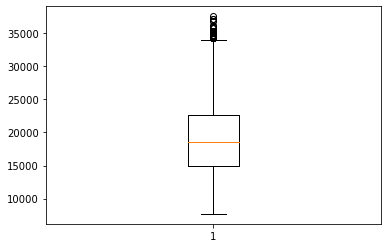

In [11]:
plt.boxplot(data["age_in_days"])
plt.show()

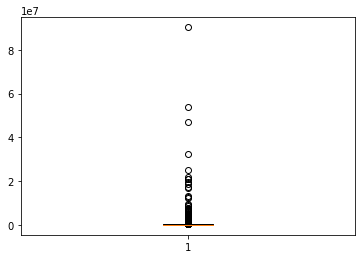

In [12]:
plt.boxplot(data["Income"])
plt.show()
#import seaborn as sns
#sns.boxplot(x=data['Income'])

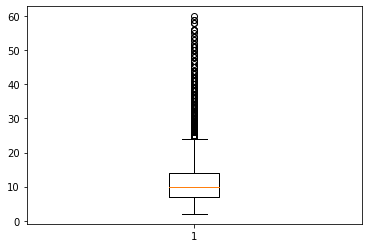

In [13]:
plt.boxplot(data["no_of_premiums_paid"])
plt.show()


C:\Users\Nani\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


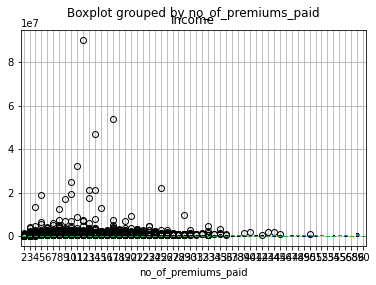

In [14]:
data.boxplot(column='Income', by='no_of_premiums_paid')

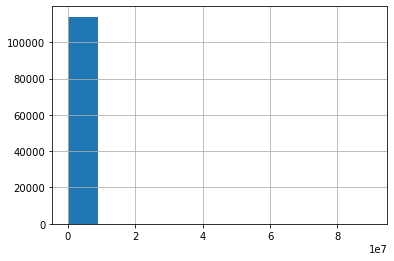

In [15]:
data.Income.hist()

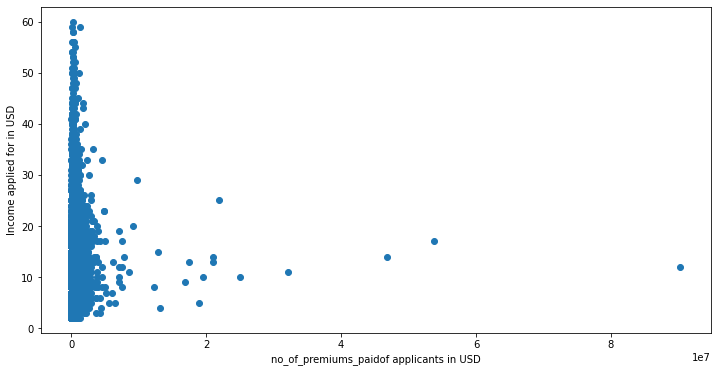

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['Income'], data['no_of_premiums_paid'])
ax.set_xlabel('no_of_premiums_paidof applicants in USD')
ax.set_ylabel('Income applied for in USD')
plt.show()

The above chart indicates that most of the data points are clustered in the left half of the plot. The points located to the extreme right of the x-axis or the y-axis indicate outliers. 

## Bivariate Analysis

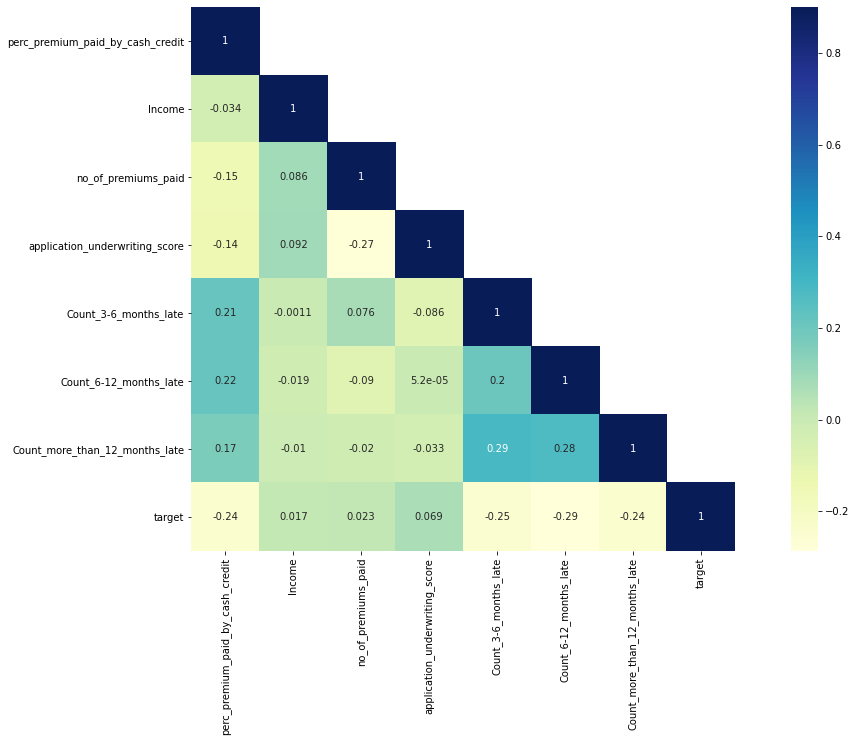

In [17]:
# looking at the correlation between numerical variables
corr = data[["perc_premium_paid_by_cash_credit","Income","no_of_premiums_paid","residence_area_type","application_underwriting_score","Count_3-6_months_late","Count_6-12_months_late","Count_more_than_12_months_late","sourcing_channel","target"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

## Outlier Treatment 

In [18]:
data['Income'].describe()

count    1.140770e+05
mean     2.070390e+05
std      4.410581e+05
min      2.403000e+04
25%      1.075600e+05
50%      1.652400e+05
75%      2.504500e+05
max      9.026260e+07
Name: Income, dtype: float64

In [19]:
Q1= data.Income.quantile(0.10)
Q3= data.Income.quantile(0.90)
Q1,Q3

(71310.0, 355040.0)

In [20]:
IQR=Q3-Q1
IQR

283730.0

In [21]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-354285.0, 780635.0)

In [22]:
data[(data.Income<lower_limit)|(data.Income>upper_limit)]

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,source
92,34577,0.163,22276,900030,0.0,0.0,0.0,99.66,12,A,Rural,1.0,train
335,1603,0.047,15344,926040,0.0,0.0,0.0,99.35,16,A,Rural,1.0,train
352,20351,0.252,17899,960030,1.0,0.0,0.0,96.07,14,E,Urban,1.0,train
364,105931,0.029,31769,2910090,0.0,0.0,0.0,99.86,7,A,Rural,1.0,train
421,68728,0.000,21175,1950090,2.0,0.0,0.0,99.41,10,A,Urban,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113500,87424,0.788,16432,1797090,0.0,0.0,0.0,99.58,16,B,Rural,NaN,test
113525,110874,0.033,15706,1200100,0.0,0.0,0.0,99.55,11,C,Urban,NaN,test
113557,112763,0.006,18987,1963650,0.0,0.0,0.0,99.85,14,A,Urban,NaN,test
113602,113924,0.695,24469,818710,0.0,0.0,0.0,99.05,13,B,Urban,NaN,test


In [23]:
data1=data[(data.Income>lower_limit)|(data.Income<upper_limit)]
data1

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,source
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1.0,train
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1.0,train
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0.0,train
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1.0,train
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114072,81988,0.227,20810,110240,0.0,0.0,0.0,97.52,9,A,Urban,NaN,test
114073,30326,0.157,19353,125090,0.0,0.0,0.0,99.62,7,A,Rural,NaN,test
114074,65749,0.325,18264,196570,0.0,0.0,0.0,98.58,14,B,Rural,NaN,test
114075,65686,0.983,16798,212150,1.0,0.0,1.0,98.88,10,A,Urban,NaN,test


In [24]:
data1.shape

(114077, 13)

In [25]:
data1.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,source
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1.0,train
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1.0,train
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0.0,train
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1.0,train
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1.0,train


In [26]:
data1['age_in_days'].describe()

count    114077.000000
mean      18839.952260
std        5220.077279
min        7670.000000
25%       14974.000000
50%       18625.000000
75%       22636.000000
max       37602.000000
Name: age_in_days, dtype: float64

In [27]:
index = data1[(data1['age_in_days'] >= 37240)|(data1['age_in_days'] <= 7671)].index
data1.drop(index, inplace=True)
data1['age_in_days'].describe()

count    114066.000000
mean      18840.507741
std        5218.806067
min        7672.000000
25%       14974.000000
50%       18625.000000
75%       22636.000000
max       37239.000000
Name: age_in_days, dtype: float64

In [28]:
data1['no_of_premiums_paid'].describe()

count    114066.000000
mean         10.872495
std           5.184383
min           2.000000
25%           7.000000
50%          10.000000
75%          14.000000
max          60.000000
Name: no_of_premiums_paid, dtype: float64

In [29]:
data1["no of premium paid"] = data1["no_of_premiums_paid"].map(lambda i: np.log(i) if i <= 24 else 0) 
print(data1['no_of_premiums_paid'].skew())
print(data1['no of premium paid'].skew())

1.2250105277233068
-1.3399352120008858


The above output shows that the skewness value came down from 1.22 to -1.33, confirming that the distribution has been treated for low values.

In [30]:
data1.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,source,no of premium paid
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1.0,train,2.564949
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1.0,train,3.044522
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0.0,train,1.945910
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1.0,train,2.197225
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1.0,train,2.484907


In [31]:
data1.drop('no_of_premiums_paid',axis=1, inplace=True)

Before building the model, let's check if there are any missing values in the dataset.

## Missing Values Analysis

In [32]:
# looking for missing values in the datasaet
data1.isnull().sum()

id                                      0
perc_premium_paid_by_cash_credit        0
age_in_days                             0
Income                                  0
Count_3-6_months_late                 128
Count_6-12_months_late                128
Count_more_than_12_months_late        128
application_underwriting_score       4295
sourcing_channel                        0
residence_area_type                     0
target                              34221
source                                  0
no of premium paid                      0
dtype: int64

In [33]:
data1['Count_3-6_months_late'].fillna(data1['Count_3-6_months_late'].mode()[0], inplace=True)
data1['Count_6-12_months_late'].fillna(data1['Count_6-12_months_late'].mode()[0], inplace=True)
data1['Count_more_than_12_months_late'].fillna(data1['Count_more_than_12_months_late'].mode()[0], inplace=True)
data1['application_underwriting_score'].fillna(data1['application_underwriting_score'].mode()[0], inplace=True)
data1['target'].fillna(data1['target'].mode()[0], inplace=True)

In [34]:
# looking for missing values in the datasaet
data1.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
sourcing_channel                    0
residence_area_type                 0
target                              0
source                              0
no of premium paid                  0
dtype: int64

Change String feild to numeric

In [35]:
data1['sourcing_channel'].value_counts()

A    61795
B    23435
C    17185
D    10781
E      870
Name: sourcing_channel, dtype: int64

In [36]:
data1.sourcing_channel=data1.sourcing_channel.map({'A':0,'B':1,'C':2,'D':3,'E':4})
data1['sourcing_channel'].value_counts()

0    61795
1    23435
2    17185
3    10781
4      870
Name: sourcing_channel, dtype: int64

In [37]:
data1['residence_area_type'].value_counts()

Urban    68785
Rural    45281
Name: residence_area_type, dtype: int64

In [38]:
data1.residence_area_type=data.residence_area_type.map({'Urban':0,'Rural':1})
data1['residence_area_type'].value_counts()

0    68785
1    45281
Name: residence_area_type, dtype: int64

In [39]:
data1['source'].value_counts()

train    79845
test     34221
Name: source, dtype: int64

In [40]:
data1.source=data.source.map({'train':0,'test':1})
data1['source'].value_counts()

0    79845
1    34221
Name: source, dtype: int64

In [41]:
data1.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,sourcing_channel,residence_area_type,target,source,no of premium paid
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,2,0,1.0,0,2.564949
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,0,0,1.0,0,3.044522
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,2,1,0.0,0,1.945910
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,0,0,1.0,0,2.197225
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,1,0,1.0,0,2.484907


In [42]:
data1.shape

(114066, 13)

In [43]:
data1.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,sourcing_channel,residence_area_type,target,source,no of premium paid
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,2,0,1.0,0,2.564949
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,0,0,1.0,0,3.044522
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,2,1,0.0,0,1.945910
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,0,0,1.0,0,2.197225
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,1,0,1.0,0,2.484907


Now the distribution looks less skewed. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look at the distribution of registered variable to check the number of registered user rentals initiated.

In [44]:
data1.shape

(114066, 13)

In [45]:
train=data1[0:79841]
train.shape

(79841, 13)

In [46]:
test=data1[79842:]
test.shape

(34224, 13)

## Model Building
### Linear Regression Model

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
# initialize the linear regression model
logreg=LogisticRegression()

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [49]:
x_train=train.drop('target', axis=1)
y_train=train['target']
x_test=test.drop('target', axis=1)
y_test = test['target']

In [50]:
# checking the shape of X_train, y_train, X_val and y_val
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((79841, 12), (79841,), (34224, 12), (34224,))

Now we have a trained logistic regression model with us. We will now make prediction on the x_test set and check the performance of our model. 

In [51]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [52]:
# making prediction on validation set
pred=logreg.predict(x_test)

In [53]:
pred

array([1., 1., 1., ..., 1., 1., 1.])

In [54]:
logreg.score(x_test,y_test)

0.999970780738663

In [55]:
logreg.score(x_train,y_train)

0.9374256334464749

We got a logreg Score value of 0.9374 on the validation set.

Let's use Decision Tree now. Note that rmsle tells us how far the predictions are from the actual value, so we want rmsle value to be as close to 0 as possible. So, we will further try to reduce this value.

##   Decision tree

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=5)

Let's fit the decision tree model now.

In [58]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [59]:
predict = dt_reg.predict(x_test)

In [60]:
final_prediction = np.exp(predict)
print(final_prediction)

[2.67609887 2.60599382 2.00962314 ... 2.60599382 2.00962314 2.67609887]


Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [61]:
submission = pd.DataFrame()

In [62]:
# creating a count column and saving the predictions in it
submission['target'] = pred

In [63]:
submission.to_csv('submission.csv', header=True, index=False)

## THANK YOU 